In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts())
fig = dict(data = [trace])
py.iplot(fig)

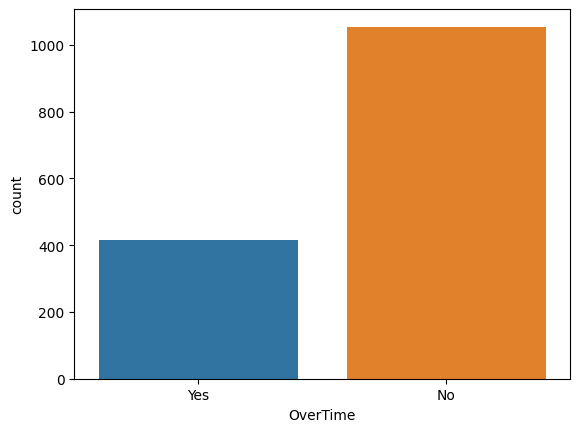

In [ ]:
sns.countplot(x=df['OverTime'])
plt.show()

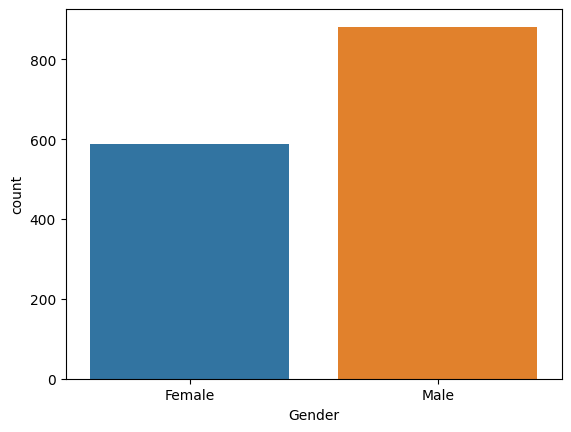

In [ ]:
sns.countplot(x=df['Gender'])
plt.show()

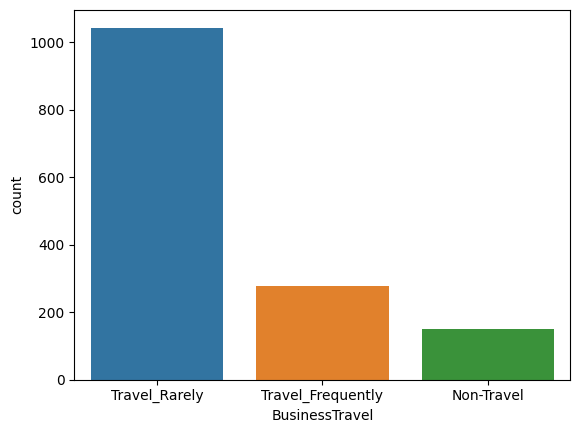

In [ ]:
sns.countplot(x=df['BusinessTravel'])
plt.show()

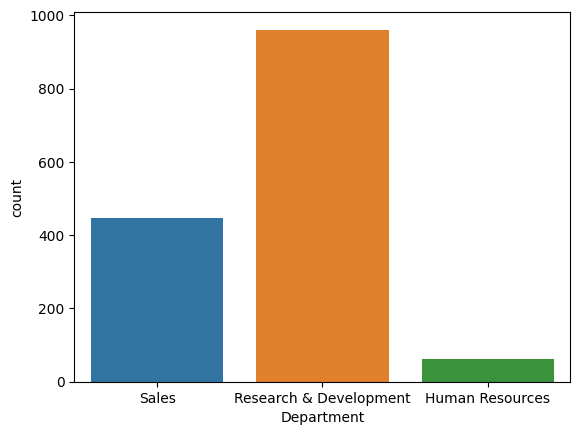

In [ ]:
sns.countplot(x=df['Department'])
plt.show()

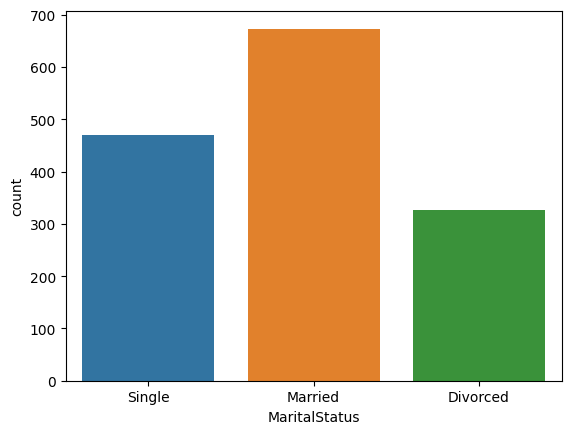

In [ ]:
sns.countplot(x=df['MaritalStatus'])
plt.show()

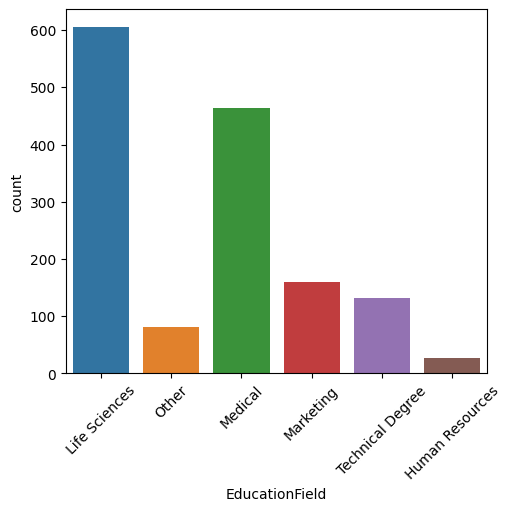

In [ ]:
# fig, ax = plt.subplot(figsize=(10, 10))
fig, ax = plt.subplots(1, 1, figsize=(5, 5), layout='constrained')
graph = sns.countplot(x=df['EducationField'], ax=ax)
plt.xticks(rotation=45)
plt.show()

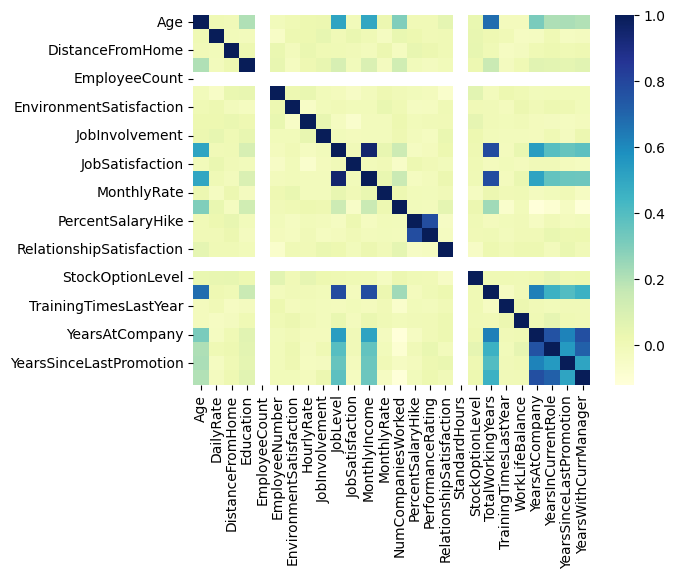

<Figure size 1000x1000 with 0 Axes>

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu")
#, cmap="Spectral"
plt.figure(figsize = (10,10))
plt.show()

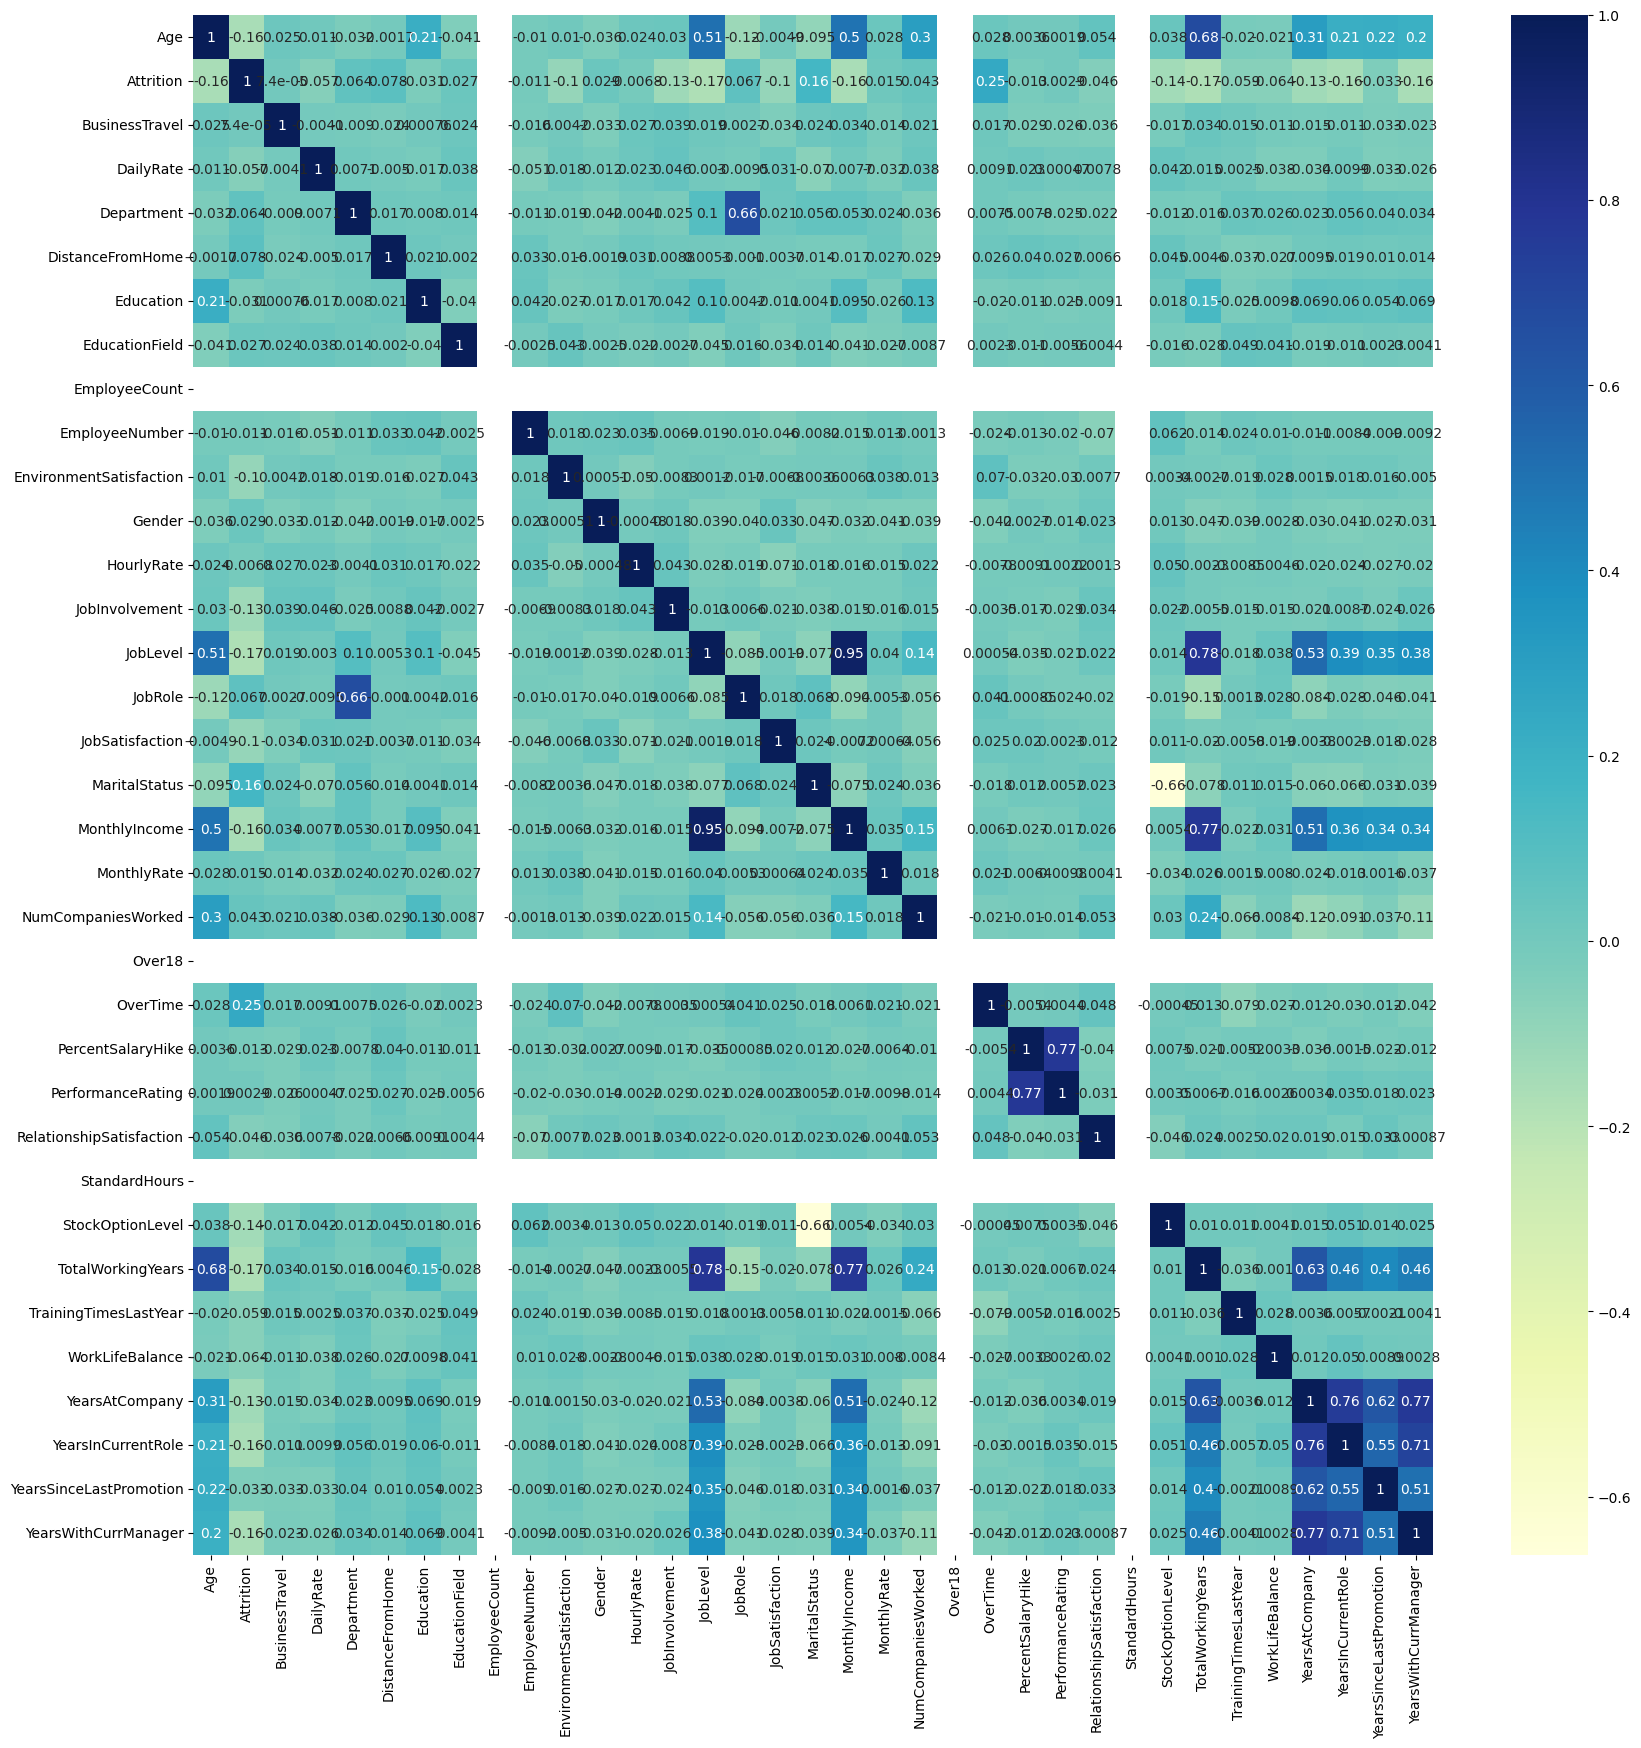

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'object']
for column in categorical_columns:
   df[column] = le.fit_transform(df[column])

In [4]:
categorical_columns = [column for column in df.columns if df[column].dtype.name == 'int64']
for column in categorical_columns:

  print("'",column,"'",",")

' Age ' ,
' Attrition ' ,
' BusinessTravel ' ,
' DailyRate ' ,
' Department ' ,
' DistanceFromHome ' ,
' Education ' ,
' EducationField ' ,
' EmployeeCount ' ,
' EmployeeNumber ' ,
' EnvironmentSatisfaction ' ,
' Gender ' ,
' HourlyRate ' ,
' JobInvolvement ' ,
' JobLevel ' ,
' JobRole ' ,
' JobSatisfaction ' ,
' MaritalStatus ' ,
' MonthlyIncome ' ,
' MonthlyRate ' ,
' NumCompaniesWorked ' ,
' Over18 ' ,
' OverTime ' ,
' PercentSalaryHike ' ,
' PerformanceRating ' ,
' RelationshipSatisfaction ' ,
' StandardHours ' ,
' StockOptionLevel ' ,
' TotalWorkingYears ' ,
' TrainingTimesLastYear ' ,
' WorkLifeBalance ' ,
' YearsAtCompany ' ,
' YearsInCurrentRole ' ,
' YearsSinceLastPromotion ' ,
' YearsWithCurrManager ' ,


In [5]:
from sklearn.preprocessing import StandardScaler

stand_data=['Age' ,
'DailyRate' ,
'DistanceFromHome' ,
'Education' ,
'EmployeeCount' ,
'EmployeeNumber' ,
'EnvironmentSatisfaction' ,
'HourlyRate' ,
'JobInvolvement' ,
'JobLevel' ,
'JobSatisfaction' ,
'MonthlyIncome' ,
'MonthlyRate' ,
'NumCompaniesWorked' ,
'PercentSalaryHike' ,
'PerformanceRating' ,
'RelationshipSatisfaction' ,
'StandardHours' ,
'StockOptionLevel' ,
'TotalWorkingYears' ,
'TrainingTimesLastYear' ,
'WorkLifeBalance' ,
'YearsAtCompany' ,
'YearsInCurrentRole' ,
'YearsSinceLastPromotion' ,
'YearsWithCurrManager']

scaler = StandardScaler()
df[stand_data] = scaler.fit_transform(df[stand_data])

df[stand_data].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [6]:
X = df.drop(['Attrition'], axis=1.0)
Y = df['Attrition']

[0.04428513 0.0239429  0.03144667 0.02487772 0.0351066  0.02787633
 0.02823399 0.         0.02915561 0.03509692 0.02237318 0.03112589
 0.03191064 0.0332459  0.03094223 0.0346378  0.03536116 0.03996574
 0.03032948 0.0314621  0.         0.06661455 0.02907217 0.01183969
 0.03050941 0.         0.03162916 0.03857325 0.0278942  0.03258172
 0.03498834 0.03199008 0.0288634  0.03406805]


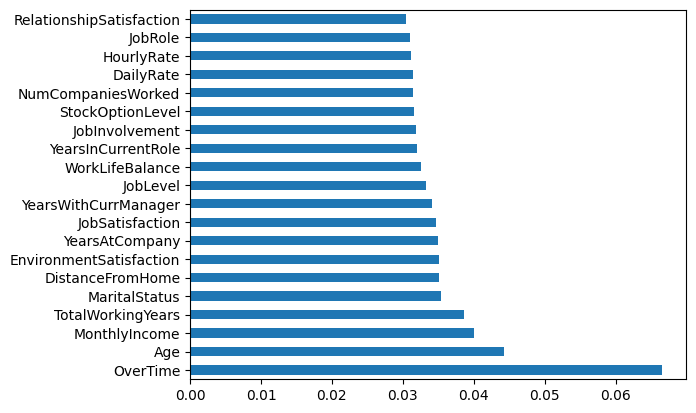

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [28]:
new_feat_imp=feat_importances.nlargest(20).index
new_feat_imp

Index(['OverTime', 'Age', 'MonthlyIncome', 'TotalWorkingYears',
       'MaritalStatus', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'YearsAtCompany', 'JobSatisfaction', 'YearsWithCurrManager', 'JobLevel',
       'WorkLifeBalance', 'YearsInCurrentRole', 'JobInvolvement',
       'StockOptionLevel', 'NumCompaniesWorked', 'DailyRate', 'HourlyRate',
       'JobRole', 'RelationshipSatisfaction'],
      dtype='object')

In [44]:
new_feat=df[['OverTime', 'Age', 'MonthlyIncome', 'TotalWorkingYears',
       'MaritalStatus', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'YearsAtCompany', 'JobSatisfaction', 'YearsWithCurrManager', 'JobLevel',
       'WorkLifeBalance', 'YearsInCurrentRole', 'JobInvolvement',
       'StockOptionLevel', 'NumCompaniesWorked', 'DailyRate', 'HourlyRate',
       'JobRole', 'RelationshipSatisfaction']]

In [45]:
new_feat.shape

(1470, 20)

In [36]:
Y.shape

(1470,)

In [35]:
X.shape

(1470, 34)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_feat, Y, test_size=0.25, random_state=42)

In [ ]:
#before feat sel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.8940217391304348


In [47]:
#after feat sel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.8913043478260869
